In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.pyplot import figure

In [2]:
G = 6.67430e-11 #Nm^2/kg^2
c = 299792458 #m/s
m_dot = 1.988e30 #kg

In [3]:
def Chirp_mass(m1,m2):
    C_mass = ((m1*m2)**(3/5))/((m1+m2)**(1/5))
    return C_mass

def g(e):
    g = ((e**(12/19))/((1-e**2)))*((1+(121*(e**2)/304))**(870/2299))
    return g

In [4]:
fL = 10 #Hz
e10_1 = 0.000001
e10_2 = 0.05
e10_3 = 0.1
e10_4 = 0.15
e10_5 = 0.2
e10_6 = 0.25

e10 = np.linspace(0, 0.25, 6)
e10[0] = 0.000001
cm = np.linspace(3, 6, num = 7)*m_dot #kg
cm2 = cm/m_dot #Solar mass
m = cm*(2**(1/5)) 
flso = 4400*m_dot/(2*m)
print(cm2)
print(m/m_dot)
print(flso)
print(e10)

[3.  3.5 4.  4.5 5.  5.5 6. ]
[3.44609506 4.02044424 4.59479342 5.1691426  5.74349177 6.31784095
 6.89219013]
[638.40374642 547.20321121 478.80280981 425.60249761 383.04224785
 348.22022532 319.20187321]
[1.0e-06 5.0e-02 1.0e-01 1.5e-01 2.0e-01 2.5e-01]


In [5]:
def dedt(e10, e, t, cm):
    diff = (-304*(g(e10)**4)/(15*(c**5)))*(((G*cm)**(5/3))*(e**(-29/19))*((np.pi*fL)**(8/3))*((1-e**2)**(3/2)))*((1+(121*(e**2)/304))**(-1181/2299))
    return diff

In [6]:
def rungekutta4(e0, t, cm):
    n = len(t)
    e = np.zeros(n)
    e[0] = e0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = dedt(e0, e[i], t[i], cm)
        k2 = dedt(e0, e[i] + k1 * h / 2, t[i] + h / 2, cm)
        k3 = dedt(e0, e[i] + k2 * h / 2, t[i] + h / 2, cm)
        k4 = dedt(e0, e[i] + k3 * h, t[i] + h, cm)
        e[i+1] = e[i] + ((h / 6) * (k1 + 2*k2 + 2*k3 + k4))
    return e

In [7]:
t = np.linspace(0, 250, 625001)

In [8]:
e1 = []
e2 = []
e3 = []
e4 = []
e5 = []
e6 = []
# e7 = []
# e8 = []
# e9 = []


for i in range(len(cm)):
    e1.append(rungekutta4(e10_1, t, cm[i]))
    e2.append(rungekutta4(e10_2, t, cm[i]))
    e3.append(rungekutta4(e10_3, t, cm[i]))
    e4.append(rungekutta4(e10_4, t, cm[i]))
    e5.append(rungekutta4(e10_5, t, cm[i]))
    e6.append(rungekutta4(e10_6, t, cm[i]))
#     e7.append(rungekutta4(e10_7, t, cm[i]))
#     e8.append(rungekutta4(e10_8, t, cm[i]))
#     e9.append(rungekutta4(e10_9, t, cm[i]))

<ipython-input-5-afe64c8631bc>:2: RuntimeWarning: invalid value encountered in double_scalars
  diff = (-304*(g(e10)**4)/(15*(c**5)))*(((G*cm)**(5/3))*(e**(-29/19))*((np.pi*fL)**(8/3))*((1-e**2)**(3/2)))*((1+(121*(e**2)/304))**(-1181/2299))


In [9]:
def dfdt(f, e, cm):
    dfdt = (96*(np.pi**(8/3))/(5*(c**5)))*(((G*cm)**(5/3))*(f**(11/3))/((1-e**2)**(7/2)))*(1+(73*(e**2)/24)+(37*(e**4)/96))
    return dfdt

def freqe (f0, t, e, cm):
    n = len(t)
    f = np.zeros(n)
    f[0] = f0
    for i in range (n-1):
        f[i+1] = f[i] + (t[1]-t[0])*dfdt(f[i], e[i], cm)
    return f

In [10]:
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
# f7 = []
# f8 = []
# f9 = []


for i in range(len(cm)):
    f1.append(freqe(fL, t, e1[i], cm[i]))
    f2.append(freqe(fL, t, e2[i], cm[i]))
    f3.append(freqe(fL, t, e3[i], cm[i]))
    f4.append(freqe(fL, t, e4[i], cm[i]))
    f5.append(freqe(fL, t, e5[i], cm[i]))
    f6.append(freqe(fL, t, e6[i], cm[i]))
#     f7.append(freqe(fL, t, e7[i], cm[i]))
#     f8.append(freqe(fL, t, e8[i], cm[i]))
#     f9.append(freqe(fL, t, e9[i], cm[i]))

# f11 = []
# f22 = []
# f33 = []
# f44 = []
# f55 = []
# f66 = []
# t11 = []
# t22 = []
# t33 = []
# t44 = []
# t55 = []
# t66 = []
    
# for i in range(len(cm)):
#     idx1 = f1[i]<flso[i]
#     f11.append(f1[i][idx1])
#     t11.append(t[idx1])
#     idx2 = f2[i]<flso[i]
#     f22.append(f2[i][idx2])
#     t22.append(t[idx2])
#     idx3 = f3[i]<flso[i]
#     f33.append(f3[i][idx3])
#     t33.append(t[idx3])
#     idx4 = f4[i]<flso[i]
#     f44.append(f4[i][idx4])
#     t44.append(t[idx4])
#     idx5 = f5[i]<flso[i]
#     f55.append(f5[i][idx5])
#     t55.append(t[idx5])
#     idx6 = f6[i]<flso[i]
#     f66.append(f6[i][idx6])
#     t66.append(t[idx6])


In [11]:
# print(f22[0].shape)
# print(f2[0].shape)
# print(t22[0].shape)

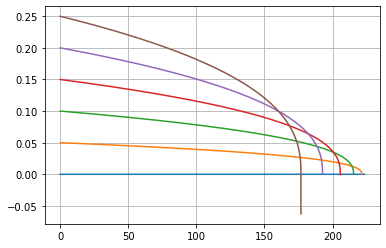

In [12]:
plt.plot(t, e1[0])
plt.plot(t, e2[0])
plt.plot(t, e3[0])
plt.plot(t, e4[0])
plt.plot(t, e5[0])
plt.plot(t, e6[0])
# plt.plot(t, e7[0])
# plt.plot(t, e8[0])
# plt.plot(t, e9[0])
plt.grid()

In [13]:
# plt.plot(t11[0], f11[0])
# plt.plot(t22[0], f22[0])
# plt.plot(t33[0], f33[0])
# plt.plot(t44[0], f44[0])
# plt.plot(t55[0], f55[0])
# plt.plot(t66[0], f66[0])
# plt.grid()

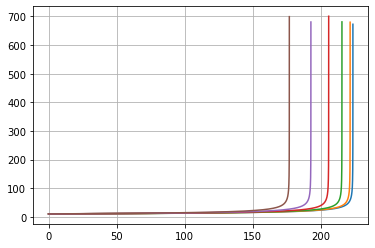

In [14]:
plt.plot(t, f1[0])
plt.plot(t, f2[0])
plt.plot(t, f3[0])
plt.plot(t, f4[0])
plt.plot(t, f5[0])
plt.plot(t, f6[0])
# plt.plot(t, f7[0])
# plt.plot(t, f8[0])
# plt.plot(t, f9[0])
plt.grid()

In [15]:
tc1 = []
tc2 = []
tc3 = []
tc4 = []
tc5 = []
tc6 = []
# tc7 = []
# tc8 = []
# tc9 = []


for i in range(len(cm)):
    tc1.append(np.interp(flso[i], f1[i], t))
    tc2.append(np.interp(flso[i], f2[i], t))
    tc3.append(np.interp(flso[i], f3[i], t))
    tc4.append(np.interp(flso[i], f4[i], t))
    tc5.append(np.interp(flso[i], f5[i], t))
    tc6.append(np.interp(flso[i], f6[i], t))
#     tc7.append(np.interp(flso[i], f7[i], t))
#     tc8.append(np.interp(flso[i], f8[i], t))
#     tc9.append(np.interp(flso[i], f9[i], t))


print(tc1)
print(tc2)
print(tc3)
print(tc4)
print(tc5)
print(tc6)
# print(tc7)
# print(tc8)
# print(tc9)


[223.45711267393202, 172.82806099450906, 138.34333143436626, 113.68425541021684, 95.3746858567781, 81.3653486363773, 70.38037405371688]
[221.42462036649655, 171.2560688453873, 137.0849941775532, 112.65020272718444, 94.50716752654574, 80.6252483475589, 69.74017865684753]
[215.41300603347457, 166.60649604012812, 133.36314124805986, 109.5917268294305, 91.94125066676122, 78.43620244520301, 67.84664425622381]
[205.67517983279023, 159.0749491322019, 127.33434415345761, 104.63749643445891, 87.78488592474075, 74.89031192699177, 64.779428665097]
[192.61741020850357, 148.97566656623113, 119.25013976470171, 97.99421311860763, 82.21148899267301, 70.13551650215014, 60.6665061118602]
[176.7776057743869, 136.72465841589818, 109.44354750865432, 89.93553890725175, 75.45064427456036, 64.3676823483275, 55.67730013180294]


<ipython-input-16-b4b0c1c744a7>:44: RuntimeWarning: invalid value encountered in log
  x_1 = np.log(t_1[i])
<ipython-input-16-b4b0c1c744a7>:56: RuntimeWarning: invalid value encountered in log
  x_1 = np.log(t_2[i])
<ipython-input-16-b4b0c1c744a7>:68: RuntimeWarning: invalid value encountered in log
  x_1 = np.log(t_3[i])
<ipython-input-16-b4b0c1c744a7>:80: RuntimeWarning: invalid value encountered in log
  x_1 = np.log(t_4[i])
<ipython-input-16-b4b0c1c744a7>:92: RuntimeWarning: invalid value encountered in log
  x_1 = np.log(t_5[i])
<ipython-input-16-b4b0c1c744a7>:104: RuntimeWarning: invalid value encountered in log
  x_1 = np.log(t_6[i])


5.07436023564673
5.409219506038364
3.5494219886932563


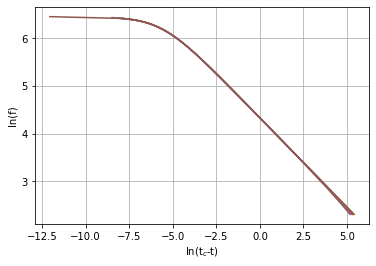

In [16]:
t_1 = []
t_2 = []
t_3 = []
t_4 = []
t_5 = []
t_6 = []
# t_7 = []
# t_8 = []
# t_9 = []

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
x4 = []
y4 = []
x5 = []
y5 = []
x6 = []
y6 = []
# x7 = []
# y7 = []
# x8 = []
# y8 = []
# x9 = []
# y9 = []


for i in range(len(cm)):
    t_1.append(tc1[i]-t)
    t_2.append(tc2[i]-t)
    t_3.append(tc3[i]-t)
    t_4.append(tc4[i]-t)
    t_5.append(tc5[i]-t)
    t_6.append(tc6[i]-t)
#     t_7.append(tc7[i]-t)
#     t_8.append(tc8[i]-t)
#     t_9.append(tc9[i]-t)

    
for i in range(len(cm)):
    x_1 = np.log(t_1[i])
    y_1 = np.log(f1[i])
    idx1_1 = ~np.isnan(y_1)
    y_1 = y_1[idx1_1]
    x_1 = x_1[idx1_1]
    idx1_2 = ~np.isnan(x_1)
    y_1 = y_1[idx1_2]
    x_1 = x_1[idx1_2]
    x1.append(x_1)
    y1.append(y_1)
    
for i in range(len(cm)):
    x_1 = np.log(t_2[i])
    y_1 = np.log(f2[i])
    idx1_1 = ~np.isnan(y_1)
    y_1 = y_1[idx1_1]
    x_1 = x_1[idx1_1]
    idx1_2 = ~np.isnan(x_1)
    y_1 = y_1[idx1_2]
    x_1 = x_1[idx1_2]
    x2.append(x_1)
    y2.append(y_1)

for i in range(len(cm)):
    x_1 = np.log(t_3[i])
    y_1 = np.log(f3[i])
    idx1_1 = ~np.isnan(y_1)
    y_1 = y_1[idx1_1]
    x_1 = x_1[idx1_1]
    idx1_2 = ~np.isnan(x_1)
    y_1 = y_1[idx1_2]
    x_1 = x_1[idx1_2]
    x3.append(x_1)
    y3.append(y_1)

for i in range(len(cm)):
    x_1 = np.log(t_4[i])
    y_1 = np.log(f4[i])
    idx1_1 = ~np.isnan(y_1)
    y_1 = y_1[idx1_1]
    x_1 = x_1[idx1_1]
    idx1_2 = ~np.isnan(x_1)
    y_1 = y_1[idx1_2]
    x_1 = x_1[idx1_2]
    x4.append(x_1)
    y4.append(y_1)

for i in range(len(cm)):
    x_1 = np.log(t_5[i])
    y_1 = np.log(f5[i])
    idx1_1 = ~np.isnan(y_1)
    y_1 = y_1[idx1_1]
    x_1 = x_1[idx1_1]
    idx1_2 = ~np.isnan(x_1)
    y_1 = y_1[idx1_2]
    x_1 = x_1[idx1_2]
    x5.append(x_1)
    y5.append(y_1)
    
for i in range(len(cm)):
    x_1 = np.log(t_6[i])
    y_1 = np.log(f6[i])
    idx1_1 = ~np.isnan(y_1)
    y_1 = y_1[idx1_1]
    x_1 = x_1[idx1_1]
    idx1_2 = ~np.isnan(x_1)
    y_1 = y_1[idx1_2]
    x_1 = x_1[idx1_2]
    x6.append(x_1)
    y6.append(y_1)

# for i in range(len(cm)):
#     x_1 = np.log(t_7[i])
#     y_1 = np.log(f7[i])
#     idx1_1 = ~np.isnan(y_1)
#     y_1 = y_1[idx1_1]
#     x_1 = x_1[idx1_1]
#     idx1_2 = ~np.isnan(x_1)
#     y_1 = y_1[idx1_2]
#     x_1 = x_1[idx1_2]
#     x7.append(x_1)
#     y7.append(y_1)

# for i in range(len(cm)):
#     x_1 = np.log(t_8[i])
#     y_1 = np.log(f8[i])
#     idx1_1 = ~np.isnan(y_1)
#     y_1 = y_1[idx1_1]
#     x_1 = x_1[idx1_1]
#     idx1_2 = ~np.isnan(x_1)
#     y_1 = y_1[idx1_2]
#     x_1 = x_1[idx1_2]
#     x8.append(x_1)
#     y8.append(y_1)
    
# for i in range(len(cm)):
#     x_1 = np.log(t_9[i])
#     y_1 = np.log(f9[i])
#     idx1_1 = ~np.isnan(y_1)
#     y_1 = y_1[idx1_1]
#     x_1 = x_1[idx1_1]
#     idx1_2 = ~np.isnan(x_1)
#     y_1 = y_1[idx1_2]
#     x_1 = x_1[idx1_2]
#     x9.append(x_1)
#     y9.append(y_1)

print(np.interp(2 ,-x1[0], y1[0]))
print(np.interp(2, y1[0], x1[0]))
print(np.interp(3, y1[0], x1[0]))

plt.plot(x1[0], y1[0])
plt.plot(x2[0], y2[0])
plt.plot(x3[0], y3[0])
plt.plot(x4[0], y4[0])
plt.plot(x5[0], y5[0])
plt.plot(x6[0], y6[0])

plt.xlabel(r'ln(t${}_c$-t)')
plt.ylabel('ln(f)')
plt.grid()
plt.show()

In [17]:
x1_1 = []
y1_1 = []
m1=[]
b1=[]

x2_1 = []
y2_1 = []
m2=[]
b2=[]

x3_1 = []
y3_1 = []
m3=[]
b3=[]

x4_1 = []
y4_1 = []
m4=[]
b4=[]

x5_1 = []
y5_1 = []
m5=[]
b5=[]

x6_1 = []
y6_1 = []
m6=[]
b6=[]

# x7_1 = []
# y7_1 = []
# m7=[]
# b7=[]

# x8_1 = []
# y8_1 = []
# m8=[]
# b8=[]

# x9_1 = []
# y9_1 = []
# m9=[]
# b9=[]

for i in range(len(cm)):
#     idx1_1 = x1[i]<2
    idx1_2 = x1[i]>-2
#     idx1 = idx1_1*idx1_2
    x1_1.append(x1[i][idx1_2])
    y1_1.append(y1[i][idx1_2])
    
#     idx2_1 = x2[i]<2
    idx2_2 = x2[i]>-2
#     idx2 = idx2_1*idx2_2
    x2_1.append(x2[i][idx2_2])
    y2_1.append(y2[i][idx2_2])
    
#     idx3_1 = x3[i]<2
    idx3_2 = x3[i]>-2
#     idx3 = idx3_1*idx3_2
    x3_1.append(x3[i][idx3_2])
    y3_1.append(y3[i][idx3_2])
    
#     idx4_1 = x4[i]<2
    idx4_2 = x4[i]>-2
#     idx4 = idx4_1*idx4_2
    x4_1.append(x4[i][idx4_2])
    y4_1.append(y4[i][idx4_2])
    
#     idx3_1 = x3[i]<2
    idx5_2 = x5[i]>-2
#     idx3 = idx3_1*idx3_2
    x5_1.append(x5[i][idx5_2])
    y5_1.append(y5[i][idx5_2])
    
#     idx4_1 = x4[i]<2
    idx6_2 = x6[i]>-2
#     idx4 = idx4_1*idx4_2
    x6_1.append(x6[i][idx6_2])
    y6_1.append(y6[i][idx6_2])
    
#     #     idx4_1 = x4[i]<2
#     idx7_2 = x7[i]>-2
# #     idx4 = idx4_1*idx4_2
#     x7_1.append(x7[i][idx7_2])
#     y7_1.append(y7[i][idx7_2])
    
# #     idx3_1 = x3[i]<2
#     idx8_2 = x8[i]>-2
# #     idx3 = idx3_1*idx3_2
#     x8_1.append(x8[i][idx8_2])
#     y8_1.append(y8[i][idx8_2])
    
# #     idx4_1 = x4[i]<2
#     idx9_2 = x9[i]>-2
# #     idx4 = idx4_1*idx4_2
#     x9_1.append(x9[i][idx9_2])
#     y9_1.append(y9[i][idx9_2])


for i in range(len(cm)):
    m_1, b_1 = np.polyfit(x1_1[i], y1_1[i], 1)
    m1.append(m_1)
    b1.append(b_1)
    m_2, b_2 = np.polyfit(x2_1[i], y2_1[i], 1)
    m2.append(m_2)
    b2.append(b_2)
    m_3, b_3 = np.polyfit(x3_1[i], y3_1[i], 1)
    m3.append(m_3)
    b3.append(b_3)
    m_4, b_4 = np.polyfit(x4_1[i], y4_1[i], 1)
    m4.append(m_4)
    b4.append(b_4)
    m_5, b_5 = np.polyfit(x5_1[i], y5_1[i], 1)
    m5.append(m_5)
    b5.append(b_5)
    m_6, b_6 = np.polyfit(x6_1[i], y6_1[i], 1)
    m6.append(m_6)
    b6.append(b_6)
#     m_7, b_7 = np.polyfit(x7_1[i], y7_1[i], 1)
#     m7.append(m_7)
#     b7.append(b_7)
#     m_8, b_8 = np.polyfit(x8_1[i], y8_1[i], 1)
#     m8.append(m_8)
#     b8.append(b_8)
#     m_9, b_9 = np.polyfit(x9_1[i], y9_1[i], 1)
#     m9.append(m_9)
#     b9.append(b_9)
    
# print(m1)
# print(m2)
# print(m3)
# print(m4)
# print(m5)
# print(m6)
# print(m7)
# print(m8)
# print(m9)
print(b1)
print(b2)
print(b3)
print(b4)
print(b5)
print(b6)
# print(b7)
# print(b8)
# print(b9)
# print(x1_1[0])
# print(y1_1[0])

[4.330736422745263, 4.234230913092853, 4.1505890924562445, 4.076769151493914, 4.010695346858928, 3.95088534048411, 3.8962489392913953]
[4.332634490430967, 4.235924096486731, 4.152104149978091, 4.078128644333117, 4.011916634096749, 3.951981542200667, 3.8972269691177543]
[4.338260609053682, 4.240932074975609, 4.156578962946542, 4.082134112432678, 4.015501449367462, 3.9551849377722132, 3.9000864006821834]
[4.3474036923906585, 4.249033094615442, 4.163785453715923, 4.088550394981683, 4.021214582662267, 3.9602615027138315, 3.9045799237687437]
[4.359687991007311, 4.259852717117349, 4.173329282367045, 4.096977975621278, 4.0286429919608615, 3.9667891172644123, 3.9102873954994113]
[4.374570979342086, 4.272809510110389, 4.1846341361487545, 4.106821526228603, 4.037177134389722, 3.9741474927857805, 3.916563981228446]


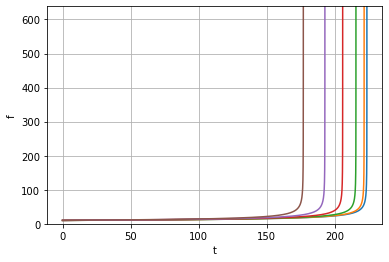

In [18]:
f_1 = []
f_2 = []
f_3 = []
f_4 = []
f_5 = []
f_6 = []

for i in range(len(cm)):
    f_11 = np.exp(m1[i]*x1[i]+b1[i])
    f_1.append(f_11)
    f_22 = np.exp(m2[i]*x2[i]+b2[i])
    f_2.append(f_22)
    f_33 = np.exp(m3[i]*x3[i]+b3[i])
    f_3.append(f_33)
    f_44 = np.exp(m4[i]*x4[i]+b4[i])
    f_4.append(f_44)
    f_55 = np.exp(m5[i]*x5[i]+b5[i])
    f_5.append(f_55)
    f_66 = np.exp(m6[i]*x6[i]+b6[i])
    f_6.append(f_66)
    

plt.plot(tc1[0]-np.exp(x1[0]), f_1[0])
plt.plot(tc2[0]-np.exp(x2[0]), f_2[0])
plt.plot(tc3[0]-np.exp(x3[0]), f_3[0])
plt.plot(tc4[0]-np.exp(x4[0]), f_4[0])
plt.plot(tc5[0]-np.exp(x5[0]), f_5[0])
plt.plot(tc6[0]-np.exp(x6[0]), f_6[0])

plt.xlabel(r't')
plt.ylabel('f')
plt.ylim(0, flso[0])
plt.grid()
plt.show()

222.97608154384832


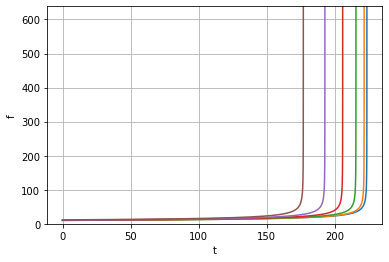

In [19]:
f_7 = []
f_8 = []
f_9 = []
f_10 = []
f_12 = []
f_13 = []

for i in range(len(cm)):
    f_11 = np.exp(-3/8*x1[i]+b1[i])
    f_7.append(f_11)
    f_22 = np.exp(-3/8*x2[i]+b2[i])
    f_8.append(f_22)
    f_33 = np.exp(-3/8*x3[i]+b3[i])
    f_9.append(f_33)
    f_44 = np.exp(-3/8*x4[i]+b4[i])
    f_10.append(f_44)
    f_55 = np.exp(-3/8*x5[i]+b5[i])
    f_12.append(f_55)
    f_66 = np.exp(-3/8*x6[i]+b6[i])
    f_13.append(f_66)

t1_1 = tc1[0]-np.exp(x1[0])
print(np.interp(100, f_7[0], t1_1))
plt.plot(tc1[0]-np.exp(x1[0]), f_7[0])
plt.plot(tc2[0]-np.exp(x2[0]), f_8[0])
plt.plot(tc3[0]-np.exp(x3[0]), f_9[0])
plt.plot(tc4[0]-np.exp(x4[0]), f_10[0])
plt.plot(tc5[0]-np.exp(x5[0]), f_12[0])
plt.plot(tc6[0]-np.exp(x6[0]), f_13[0])

plt.xlabel('t')
plt.ylabel('f')
plt.ylim(0, flso[0])
plt.grid()
plt.show()

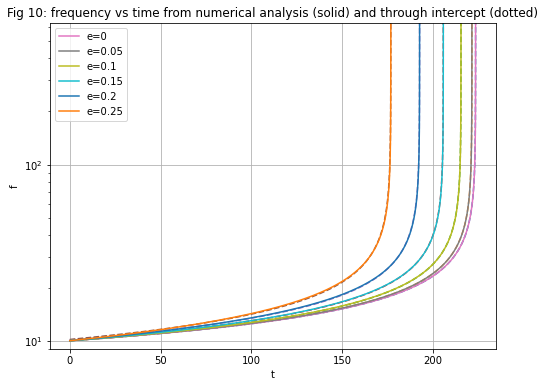

In [20]:
# fig, ax = plt.subplots()
figure(figsize=(8, 6))

plt.plot(tc1[0]-np.exp(x1[0]), f_1[0], linestyle='dashed')
plt.plot(tc2[0]-np.exp(x2[0]), f_2[0], linestyle='dashed')
plt.plot(tc3[0]-np.exp(x3[0]), f_3[0], linestyle='dashed')
plt.plot(tc4[0]-np.exp(x4[0]), f_4[0], linestyle='dashed')
plt.plot(tc5[0]-np.exp(x5[0]), f_5[0], linestyle='dashed')
plt.plot(tc6[0]-np.exp(x6[0]), f_6[0], linestyle='dashed')

# plt.plot(tc1[2]-np.exp(x1[2]), f_7[2], linestyle='dotted')
# plt.plot(tc2[2]-np.exp(x2[2]), f_8[2], linestyle='dotted')
# plt.plot(tc3[2]-np.exp(x3[2]), f_9[2], linestyle='dotted')
# plt.plot(tc4[2]-np.exp(x4[2]), f_10[2], linestyle='dotted')
# plt.plot(tc5[2]-np.exp(x5[2]), f_12[2], linestyle='dotted')
# plt.plot(tc6[2]-np.exp(x6[2]), f_13[2], linestyle='dotted')

plt.plot(t, f1[0], label = 'e=0')
plt.plot(t, f2[0], label = 'e=0.05')
plt.plot(t, f3[0], label = 'e=0.1')
plt.plot(t, f4[0], label = 'e=0.15')
plt.plot(t, f5[0], label = 'e=0.2')
plt.plot(t, f6[0], label = 'e=0.25')
# ax.set_yscale('log', basey= np.e)
# plt.semilogy(basey=np.e)
# plt.semilogx(basex=10)
plt.yscale("log")
# plt.yticks(np.arange(8, 15, 1))
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.ylim(9, flso[0])
# plt.xlim(0, 100)
plt.title('Fig 10: frequency vs time from numerical analysis (solid) and through intercept (dotted)')
plt.grid()
plt.show()

<ipython-input-21-389c969225a1>:23: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.semilogy(basey=np.e)


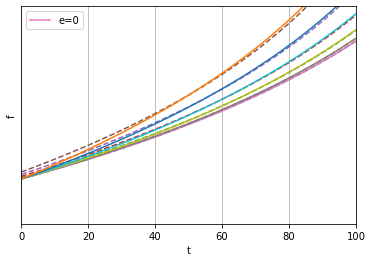

In [21]:
plt.plot(tc1[1]-np.exp(x1[1]), f_1[1], linestyle='dashed')
plt.plot(tc2[1]-np.exp(x2[1]), f_2[1], linestyle='dashed')
plt.plot(tc3[1]-np.exp(x3[1]), f_3[1], linestyle='dashed')
plt.plot(tc4[1]-np.exp(x4[1]), f_4[1], linestyle='dashed')
plt.plot(tc5[1]-np.exp(x5[1]), f_5[1], linestyle='dashed')
plt.plot(tc6[1]-np.exp(x6[1]), f_6[1], linestyle='dashed')

# plt.plot(tc1[1]-np.exp(x1[1]), f_7[1], linestyle='dotted')
# plt.plot(tc2[1]-np.exp(x2[1]), f_8[1], linestyle='dotted')
# plt.plot(tc3[1]-np.exp(x3[1]), f_9[1], linestyle='dotted')
# plt.plot(tc4[1]-np.exp(x4[1]), f_10[1], linestyle='dotted')
# plt.plot(tc5[1]-np.exp(x5[1]), f_12[1], linestyle='dotted')
# plt.plot(tc6[1]-np.exp(x6[1]), f_13[1], linestyle='dotted')


plt.plot(t, f1[1], label = 'e=0')
plt.plot(t, f2[1])
plt.plot(t, f3[1])
plt.plot(t, f4[1])
plt.plot(t, f5[1])
plt.plot(t, f6[1])
plt.legend()
plt.semilogy(basey=np.e)
# plt.semilogx(basex=10)
# plt.yscale("log")
# plt.yticks(np.arange(8, 15, 1))
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.ylim(9, 15)
plt.xlim(0, 100)
plt.grid()
plt.show()

<ipython-input-22-a4fa9bd14970>:22: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.semilogy(basey=np.e)


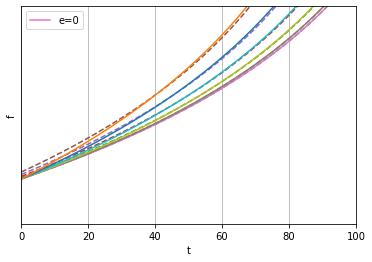

In [22]:
plt.plot(tc1[2]-np.exp(x1[2]), f_1[2], linestyle='dashed')
plt.plot(tc2[2]-np.exp(x2[2]), f_2[2], linestyle='dashed')
plt.plot(tc3[2]-np.exp(x3[2]), f_3[2], linestyle='dashed')
plt.plot(tc4[2]-np.exp(x4[2]), f_4[2], linestyle='dashed')
plt.plot(tc5[2]-np.exp(x5[2]), f_5[2], linestyle='dashed')
plt.plot(tc6[2]-np.exp(x6[2]), f_6[2], linestyle='dashed')

# plt.plot(tc1[2]-np.exp(x1[2]), f_7[2], linestyle='dotted')
# plt.plot(tc2[2]-np.exp(x2[2]), f_8[2], linestyle='dotted')
# plt.plot(tc3[2]-np.exp(x3[2]), f_9[2], linestyle='dotted')
# plt.plot(tc4[2]-np.exp(x4[2]), f_10[2], linestyle='dotted')
# plt.plot(tc5[2]-np.exp(x5[2]), f_12[2], linestyle='dotted')
# plt.plot(tc6[2]-np.exp(x6[2]), f_13[2], linestyle='dotted')

plt.plot(t, f1[2], label = 'e=0')
plt.plot(t, f2[2])
plt.plot(t, f3[2])
plt.plot(t, f4[2])
plt.plot(t, f5[2])
plt.plot(t, f6[2])
plt.legend()
plt.semilogy(basey=np.e)
# plt.semilogx(basex=10)
# plt.yscale("log")
# plt.yticks(np.arange(8, 15, 1))
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.ylim(9, 15)
plt.xlim(0, 100)
plt.grid()
plt.show()

<ipython-input-23-627ba803b0cb>:22: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.semilogy(basey=np.e)


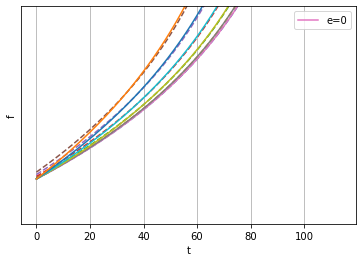

In [23]:
plt.plot(tc1[3]-np.exp(x1[3]), f_1[3], linestyle='dashed')
plt.plot(tc2[3]-np.exp(x2[3]), f_2[3], linestyle='dashed')
plt.plot(tc3[3]-np.exp(x3[3]), f_3[3], linestyle='dashed')
plt.plot(tc4[3]-np.exp(x4[3]), f_4[3], linestyle='dashed')
plt.plot(tc5[3]-np.exp(x5[3]), f_5[3], linestyle='dashed')
plt.plot(tc6[3]-np.exp(x6[3]), f_6[3], linestyle='dashed')

# plt.plot(tc1[3]-np.exp(x1[3]), f_7[3], linestyle='dotted')
# plt.plot(tc2[3]-np.exp(x2[3]), f_8[3], linestyle='dotted')
# plt.plot(tc3[3]-np.exp(x3[3]), f_9[3], linestyle='dotted')
# plt.plot(tc4[3]-np.exp(x4[3]), f_10[3], linestyle='dotted')
# plt.plot(tc5[3]-np.exp(x5[3]), f_12[3], linestyle='dotted')
# plt.plot(tc6[3]-np.exp(x6[3]), f_13[3], linestyle='dotted')

plt.plot(t, f1[3], label = 'e=0')
plt.plot(t, f2[3])
plt.plot(t, f3[3])
plt.plot(t, f4[3])
plt.plot(t, f5[3])
plt.plot(t, f6[3])
plt.legend()
plt.semilogy(basey=np.e)
# plt.semilogx(basex=10)
# plt.yscale("log")
# plt.yticks(np.arange(8, 15, 1))
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.ylim(9, 15)
# plt.xlim(0, 100)
plt.grid()
plt.show()

In [24]:
epsilon = 0.06110974175360381
delta = -0.4193723077257345
const_beta = 0.00801015132110059
delta_beta = -2.14807199936756e-5
k_beta = 1.12702400406416e-8
const2_beta = -1.9753003183066e-12
const_gamma = 0.024204222771565382
delta_gamma = -6.261945897154536e-6
k_gamma = 1.1175104924576945e-8
const2_gamma = -3.681726165703978e-12

In [25]:
def alpha(M):
    alpha = epsilon*(M) + delta
    return alpha

def beta(M):
    beta = const_beta*((M)**2) + delta_beta*((M)**4) + k_beta*((M)**6) + const2_beta*((M)**8)
    return beta

def gamma(M):
    gamma = const_gamma*((M)**2) + delta_gamma*((M)**4) + k_gamma*((M)**6) + const2_gamma*((M)**8)
    return gamma

def MeM(M, e):
    MeM = 1 + alpha(M)*(e**2) + beta(M)*(e**4) + gamma(M)*(e**6)
    return MeM

def constant(Me):
    const = -(3/8)*np.log((256*((np.pi)**(8/3))/5)*((G*Me/(c**3))**(5/3)))
    return const

In [26]:
Me1 = []
Me2 = []
Me3 = []
Me4 = []
Me5 = []
Me6 = []

b11 = []
b22 = []
b33 = []
b44 = []
b55 = []
b66 = []

for i in range(len(cm)):
    Me_1 = MeM(cm2[i], e10_1)*cm[i]
    Me1.append(Me_1)
    Me_2 = MeM(cm2[i], e10_2)*cm[i]
    Me2.append(Me_2)
    Me_3 = MeM(cm2[i], e10_3)*cm[i]
    Me3.append(Me_3)
    Me_4 = MeM(cm2[i], e10_4)*cm[i]
    Me4.append(Me_4)
    Me_5 = MeM(cm2[i], e10_5)*cm[i]
    Me5.append(Me_5)
    Me_6 = MeM(cm2[i], e10_6)*cm[i]
    Me6.append(Me_6)
    
for i in range(len(cm)):
    b_1 = constant(Me1[i])
    b11.append(b_1)
    b_2 = constant(Me2[i])
    b22.append(b_2)
    b_3 = constant(Me3[i])
    b33.append(b_3)
    b_4 = constant(Me4[i])
    b44.append(b_4)
    b_5 = constant(Me5[i])
    b55.append(b_5)
    b_6 = constant(Me6[i])
    b66.append(b_6)
    
print(b11)
print(b1)
print(b22)
print(b2)
print(b33)
print(b3)
print(b44)
print(b4)
print(b55)
print(b5)
print(b66)
print(b6)

x_axis_0 = [b1[0], b2[0], b3[0], b4[0], b5[0], b6[0]]
y_axis_0 = [b11[0], b22[0], b33[0], b44[0], b55[0], b66[0]]
x_axis_1 = [b1[1], b2[1], b3[1], b4[1], b5[1], b6[1]]
y_axis_1 = [b11[1], b22[1], b33[1], b44[1], b55[1], b66[1]]
x_axis_2 = [b1[2], b2[2], b3[2], b4[2], b5[2], b6[2]]
y_axis_2 = [b11[2], b22[2], b33[2], b44[2], b55[2], b66[2]]
x_axis_3 = [b1[3], b2[3], b3[3], b4[3], b5[3], b6[3]]
y_axis_3 = [b11[3], b22[3], b33[3], b44[3], b55[3], b66[3]]
x_axis_4 = [b1[4], b2[4], b3[4], b4[4], b5[4], b6[4]]
y_axis_4 = [b11[4], b22[4], b33[4], b44[4], b55[4], b66[4]]
x_axis_5 = [b1[5], b2[5], b3[5], b4[5], b5[5], b6[5]]
y_axis_5 = [b11[5], b22[5], b33[5], b44[5], b55[5], b66[5]]
x_axis_6 = [b1[6], b2[6], b3[6], b4[6], b5[6], b6[6]]
y_axis_6 = [b11[6], b22[6], b33[6], b44[6], b55[6], b66[6]]
x_axis = [b1, b2, b3, b4, b5, b6]
y_axis = [b11, b22, b33, b44, b55, b66]
print(x_axis_0)

# plt.scatter(x_axis_1, y_axis_1)
# plt.grid()

[4.331043080866683, 4.2346989059746285, 4.151241785584283, 4.077627388299024, 4.011777066012863, 3.952208203635141, 3.897826093016603]
[4.330736422745263, 4.234230913092853, 4.1505890924562445, 4.076769151493914, 4.010695346858928, 3.95088534048411, 3.8962489392913953]
[4.331411729918472, 4.23501968993895, 4.1515146954039235, 4.077852415829001, 4.011954204130374, 3.9523374463453838, 3.8979074355540075]
[4.332634490430967, 4.235924096486731, 4.152104149978091, 4.078128644333117, 4.011916634096749, 3.951981542200667, 3.8972269691177543]
[4.332515549989359, 4.235978398747478, 4.152328152165031, 4.078520493605058, 4.012476791470894, 3.9527144488620847, 3.8981387774246334]
[4.338260609053682, 4.240932074975609, 4.156578962946542, 4.082134112432678, 4.015501449367462, 3.9551849377722132, 3.9000864006821834]
[4.334347346385995, 4.237562998283593, 4.153664904887172, 4.0796088110084, 4.013316153522205, 3.9533044107206763, 3.898478975832978]
[4.3474036923906585, 4.249033094615442, 4.163785453715

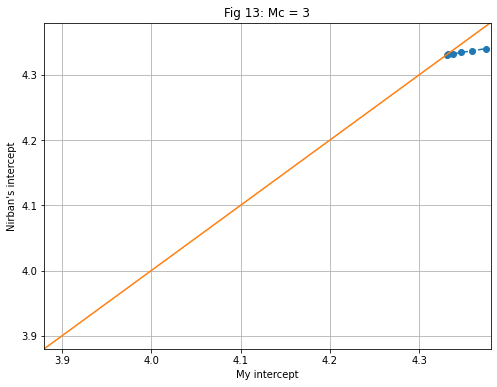

In [27]:
straight_line = [3.88, 4.38]
figure(figsize=(8, 6))
plt.plot(x_axis_0, y_axis_0, linestyle='--', marker='o')
plt.plot(straight_line, straight_line)
plt.ylabel('Nirban\'s intercept')
plt.xlabel('My intercept')
plt.ylim(3.88, 4.38)
plt.xlim(3.88, 4.38)
plt.title('Fig 13: Mc = 3')
plt.grid()

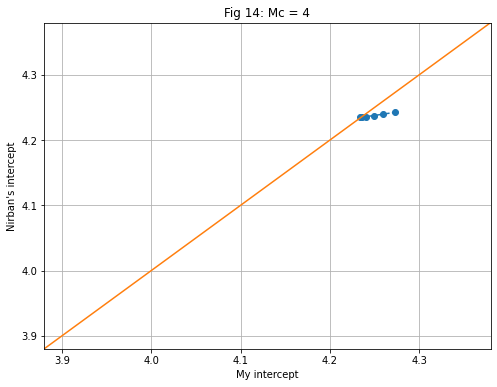

In [28]:
straight_line = [3.88, 4.38]
figure(figsize=(8, 6))
plt.plot(x_axis_1, y_axis_1, linestyle='--', marker='o')
plt.plot(straight_line, straight_line)
plt.ylabel('Nirban\'s intercept')
plt.xlabel('My intercept')
plt.ylim(3.88, 4.38)
plt.xlim(3.88, 4.38)
plt.title('Fig 14: Mc = 4')
plt.grid()

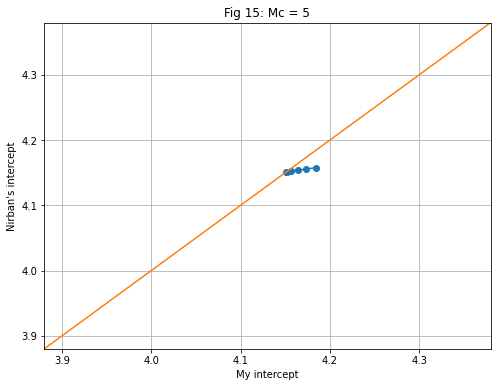

In [29]:
straight_line = [3.88, 4.38]
figure(figsize=(8, 6))
plt.plot(x_axis_2, y_axis_2, linestyle='--', marker='o')
plt.plot(straight_line, straight_line)
plt.ylabel('Nirban\'s intercept')
plt.xlabel('My intercept')
plt.ylim(3.88, 4.38)
plt.xlim(3.88, 4.38)
plt.title('Fig 15: Mc = 5')
plt.grid()

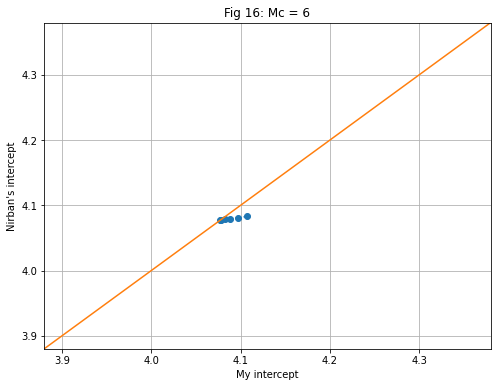

In [30]:
straight_line = [3.88, 4.38]
figure(figsize=(8, 6))
plt.plot(x_axis_3, y_axis_3, linestyle='--', marker='o')
plt.plot(straight_line, straight_line)
plt.ylabel('Nirban\'s intercept')
plt.xlabel('My intercept')
plt.ylim(3.88, 4.38)
plt.xlim(3.88, 4.38)
plt.title('Fig 16: Mc = 6')
plt.grid()

In [31]:
# plt.plot(x_axis, y_axis, linestyle='--', marker='o')
# plt.grid()

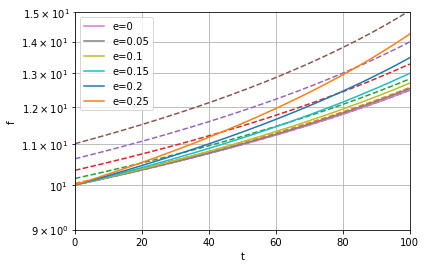

In [32]:
f_14 = []
f_15 = []
f_16 = []
f_17 = []
f_18 = []
f_19 = []

for i in range(len(cm)):
    f_11 = np.exp(-3/8*x1[i]+b11[i])
    f_14.append(f_11)
    f_22 = np.exp(-3/8*x2[i]+b22[i])
    f_15.append(f_22)
    f_33 = np.exp(-3/8*x3[i]+b33[i])
    f_16.append(f_33)
    f_44 = np.exp(-3/8*x4[i]+b44[i])
    f_17.append(f_44)
    f_55 = np.exp(-3/8*x5[i]+b55[i])
    f_18.append(f_55)
    f_66 = np.exp(-3/8*x6[i]+b66[i])
    f_19.append(f_66)
    

plt.plot(tc1[0]-np.exp(x1[0]), f_14[0], linestyle='dashed')
plt.plot(tc2[0]-np.exp(x2[0]), f_15[0], linestyle='dashed')
plt.plot(tc3[0]-np.exp(x3[0]), f_16[0], linestyle='dashed')
plt.plot(tc4[0]-np.exp(x4[0]), f_17[0], linestyle='dashed')
plt.plot(tc5[0]-np.exp(x5[0]), f_18[0], linestyle='dashed')
plt.plot(tc6[0]-np.exp(x6[0]), f_19[0], linestyle='dashed')

plt.plot(t, f1[0], label = 'e=0')
plt.plot(t, f2[0], label = 'e=0.05')
plt.plot(t, f3[0], label = 'e=0.1')
plt.plot(t, f4[0], label = 'e=0.15')
plt.plot(t, f5[0], label = 'e=0.2')
plt.plot(t, f6[0], label = 'e=0.25')

# plt.semilogy(basey=np.e)
# plt.semilogx(basex=10)
plt.yscale("log")
plt.yticks(np.arange(8, 15, 1))
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.ylim(9, 15)
plt.xlim(0, 100)
# plt.title('Fig 11: frequency vs time from numerical analysis (solid) and through only slope(dashdot)')

plt.grid()
plt.show()


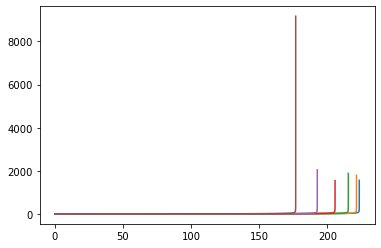

In [33]:
f_20 = []
f_21 = []
f_23 = []
f_24 = []
f_25 = []
f_26 = []

for i in range(len(cm)):
    f_11 = np.exp(m1[i]*x1[i]+constant(cm[i]))
    f_20.append(f_11)
    f_22 = np.exp(m2[i]*x2[i]+constant(cm[i]))
    f_21.append(f_22)
    f_33 = np.exp(m3[i]*x3[i]+constant(cm[i]))
    f_23.append(f_33)
    f_44 = np.exp(m4[i]*x4[i]+constant(cm[i]))
    f_24.append(f_44)
    f_55 = np.exp(m5[i]*x5[i]+constant(cm[i]))
    f_25.append(f_55)
    f_66 = np.exp(m6[i]*x6[i]+constant(cm[i]))
    f_26.append(f_66)
    

plt.plot(tc1[0]-np.exp(x1[0]), f_20[0], label = 'e=0')
plt.plot(tc2[0]-np.exp(x2[0]), f_21[0])
plt.plot(tc3[0]-np.exp(x3[0]), f_23[0])
plt.plot(tc4[0]-np.exp(x4[0]), f_24[0])
plt.plot(tc5[0]-np.exp(x5[0]), f_25[0])
plt.plot(tc6[0]-np.exp(x6[0]), f_26[0])

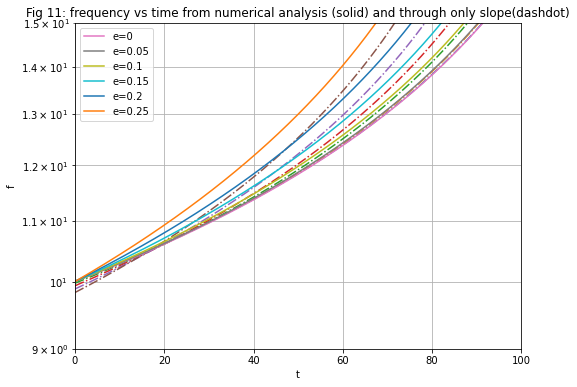

In [34]:
figure(figsize=(8, 6))
# plt.plot(tc1[2]-np.exp(x1[2]), f_1[2], linestyle='dashed')
# plt.plot(tc2[2]-np.exp(x2[2]), f_2[2], linestyle='dashed')
# plt.plot(tc3[2]-np.exp(x3[2]), f_3[2], linestyle='dashed')
# plt.plot(tc4[2]-np.exp(x4[2]), f_4[2], linestyle='dashed')
# plt.plot(tc5[2]-np.exp(x5[2]), f_5[2], linestyle='dashed')
# plt.plot(tc6[2]-np.exp(x6[2]), f_6[2], linestyle='dashed')

plt.plot(tc1[2]-np.exp(x1[2]), f_20[2], linestyle='dashdot')
plt.plot(tc2[2]-np.exp(x2[2]), f_21[2], linestyle='dashdot')
plt.plot(tc3[2]-np.exp(x3[2]), f_23[2], linestyle='dashdot')
plt.plot(tc4[2]-np.exp(x4[2]), f_24[2], linestyle='dashdot')
plt.plot(tc5[2]-np.exp(x5[2]), f_25[2], linestyle='dashdot')
plt.plot(tc6[2]-np.exp(x6[2]), f_26[2], linestyle='dashdot')

plt.plot(t, f1[2], label = 'e=0')
plt.plot(t, f2[2], label = 'e=0.05')
plt.plot(t, f3[2], label = 'e=0.1')
plt.plot(t, f4[2], label = 'e=0.15')
plt.plot(t, f5[2], label = 'e=0.2')
plt.plot(t, f6[2], label = 'e=0.25')

# plt.semilogy(basey=np.e)
# plt.semilogx(basex=10)
plt.yscale("log")
plt.yticks(np.arange(8, 15, 1))
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.ylim(9, 15)
plt.xlim(0, 100)
plt.title('Fig 11: frequency vs time from numerical analysis (solid) and through only slope(dashdot)')

plt.grid()
plt.show()

<ipython-input-35-e0f1af149cb4>:22: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.semilogy(basey=np.e)
No handles with labels found to put in legend.


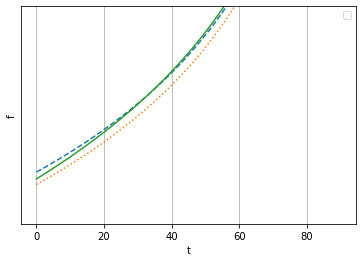

In [35]:
# plt.plot(tc1[3]-np.exp(x1[3]), f_1[3], linestyle='dashed')
# plt.plot(tc2[3]-np.exp(x2[3]), f_2[3], linestyle='dashed')
# plt.plot(tc3[3]-np.exp(x3[3]), f_3[3], linestyle='dashed')
# plt.plot(tc4[3]-np.exp(x4[3]), f_4[3], linestyle='dashed')
# plt.plot(tc5[3]-np.exp(x5[3]), f_5[3], linestyle='dashed')
plt.plot(tc6[3]-np.exp(x6[3]), f_6[3], linestyle='dashed')

# plt.plot(tc1[3]-np.exp(x1[3]), f_20[3], linestyle='dotted')
# plt.plot(tc2[3]-np.exp(x2[3]), f_21[3], linestyle='dotted')
# plt.plot(tc3[3]-np.exp(x3[3]), f_23[3], linestyle='dotted')
# plt.plot(tc4[3]-np.exp(x4[3]), f_24[3], linestyle='dotted')
# plt.plot(tc5[3]-np.exp(x5[3]), f_25[3], linestyle='dotted')
plt.plot(tc6[3]-np.exp(x6[3]), f_26[3], linestyle='dotted')

# plt.plot(t, f1[3], label = 'e=0')
# plt.plot(t, f2[3])
# plt.plot(t, f3[3])
# plt.plot(t, f4[3])
# plt.plot(t, f5[3])
plt.plot(t, f6[3])

plt.semilogy(basey=np.e)
# plt.semilogx(basex=10)
# plt.yscale("log")
# plt.yticks(np.arange(8, 15, 1))
plt.legend()
plt.xlabel('t')
plt.ylabel('f')
plt.ylim(9, 15)
# plt.xlim(0, 100)
plt.grid()
plt.show()

In [37]:
alpha_0 = [-m1[0], -m2[0], -m3[0], -m4[0], -m5[0], -m6[0]]
alpha_1 = [-m1[1], -m2[1], -m3[1], -m4[1], -m5[1], -m6[1]]
alpha_2 = [-m1[2], -m2[2], -m3[2], -m4[2], -m5[2], -m6[2]]
alpha_3 = [-m1[3], -m2[3], -m3[3], -m4[3], -m5[3], -m6[3]]
alpha_4 = [-m1[4], -m2[4], -m3[4], -m4[4], -m5[4], -m6[4]]
alpha_5 = [-m1[5], -m2[5], -m3[5], -m4[5], -m5[5], -m6[5]]
alpha_6 = [-m1[6], -m2[6], -m3[6], -m4[6], -m5[6], -m6[6]]
# alpha_7 = [-m1[7], -m2[7], -m3[7], -m4[7], -m5[7], -m6[7], -m7[7], -m8[7], -m9[7]]
# alpha_8 = [-m1[8], -m2[8], -m3[8], -m4[8], -m5[8], -m6[8], -m7[8], -m8[8], -m9[8]]
# alpha_9 = [-m1[9], -m2[9], -m3[9], -m4[9], -m5[9], -m6[9], -m7[9], -m8[9], -m9[9]]
# alpha_10 = [-m1[10], -m2[10], -m3[10], -m4[10], -m5[10], -m6[10], -m7[10], -m8[10], -m9[10]]
# alpha_11 = [-m1[11], -m2[11], -m3[11], -m4[11], -m5[11], -m6[11], -m7[11], -m8[11], -m9[11]]
# alpha_12 = [-m1[12], -m2[12], -m3[12], -m4[12], -m5[12], -m6[12], -m7[12], -m8[12], -m9[12]]
# alpha_13 = [-m1[13], -m2[13], -m3[13], -m4[13], -m5[13], -m6[13], -m7[13], -m8[13], -m9[13]]
# alpha_14 = [-m1[14], -m2[14], -m3[14], -m4[14], -m5[14], -m6[14], -m7[14], -m8[14], -m9[14]]
# alpha_15 = [-m1[15], -m2[15], -m3[15], -m4[15], -m5[15], -m6[15], -m7[15], -m8[15], -m9[15]]
# alpha_16 = [-m1[16], -m2[16], -m3[16], -m4[16], -m5[16], -m6[16], -m7[16], -m8[16], -m9[16]]
# alpha_17 = [-m1[17], -m2[17], -m3[17], -m4[17], -m5[17], -m6[17], -m7[17], -m8[17], -m9[17]]

print(alpha_0)
print(alpha_1)
print(alpha_2)
print(alpha_3)
print(alpha_4)
print(alpha_5)
print(alpha_6)
# print(alpha_7)
# print(alpha_8)
# print(alpha_9)
# print(alpha_10)
# print(alpha_11)
# print(alpha_12)
# print(alpha_13)
# print(alpha_14)
# print(alpha_15)
# print(alpha_16)
# print(alpha_17)

[0.37493451554842944, 0.37579992060794937, 0.3784090768504471, 0.3828011451737927, 0.38904241463157757, 0.3972361991561368]
[0.374895145659326, 0.37576454172266743, 0.37838574476410625, 0.38279808894210987, 0.38907276839193966, 0.3973112422489705]
[0.3748470856694093, 0.37572016386964896, 0.37835351041143456, 0.38278741999213123, 0.3890927028252096, 0.3973788587758861]
[0.3747903876501027, 0.3756674346931299, 0.3783128348191226, 0.3827674298811955, 0.389104982580889, 0.3974367999419669]
[0.37472532510337725, 0.37560649439005334, 0.3782634642415448, 0.38273935266614306, 0.38910845689552276, 0.3974847343026427]
[0.3746515601330759, 0.37553677113812256, 0.37820486462732733, 0.38270156491773016, 0.38910272278628905, 0.3975256978353127]
[0.37456995124165365, 0.3754580202719282, 0.3781383162197524, 0.38265507000835886, 0.38908871011121476, 0.3975556224809436]


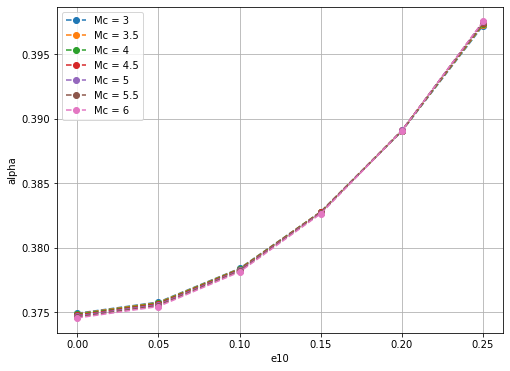

In [38]:
figure(figsize=(8, 6))
plt.plot(e10, alpha_0, label = 'Mc = 3', linestyle='--', marker='o')
plt.plot(e10, alpha_1, label = 'Mc = 3.5', linestyle='--', marker='o')
plt.plot(e10, alpha_2, label = 'Mc = 4', linestyle='--', marker='o')
plt.plot(e10, alpha_3, label = 'Mc = 4.5', linestyle='--', marker='o')
plt.plot(e10, alpha_4, label = 'Mc = 5', linestyle='--', marker='o')
plt.plot(e10, alpha_5, label = 'Mc = 5.5', linestyle='--', marker='o')
plt.plot(e10, alpha_6, label = 'Mc = 6', linestyle='--', marker='o')
# plt.plot(e10, alpha_7, label = 'Mc = 10', linestyle='--', marker='o')
# plt.plot(e10, alpha_8, label = 'Mc = 11', linestyle='--', marker='o')
# plt.plot(e10, alpha_9, label = 'Mc = 12', linestyle='--', marker='o')
# plt.plot(e10, alpha_10, label = 'Mc = 13', linestyle='--', marker='o')
# plt.plot(e10, alpha_11, label = 'Mc = 14', linestyle='--', marker='o')
# plt.plot(e10, alpha_12, label = 'Mc = 15', linestyle='--', marker='o')
# plt.plot(e10, alpha_13, label = 'Mc = 16', linestyle='--', marker='o')
# plt.plot(e10, alpha_14, label = 'Mc = 17', linestyle='--', marker='o')
# plt.plot(e10, alpha_15, label = 'Mc = 18', linestyle='--', marker='o')
# plt.plot(e10, alpha_16, label = 'Mc = 19', linestyle='--', marker='o')
# plt.plot(e10, alpha_17, label = 'Mc = 20', linestyle='--', marker='o')
plt.grid()
plt.legend()
plt.xlabel('e10')
plt.ylabel('alpha')
plt.show()
# y = 0.375(0.9998256 - 0.0000150252347*e + 0.9264096*e^2 - 0.039656*e^3 + 0.570249867*e^4)
# for Mc=3

In [39]:
alpha0 = [-m1[0], -m1[1], -m1[2], -m1[3], -m1[4], -m1[5], -m1[6]]
alpha1 = [-m2[0], -m2[1], -m2[2], -m2[3], -m2[4], -m2[5], -m2[6]]
alpha2 = [-m3[0], -m3[1], -m3[2], -m3[3], -m3[4], -m3[5], -m3[6]]
alpha3 = [-m4[0], -m4[1], -m4[2], -m4[3], -m4[4], -m4[5], -m4[6]]
alpha4 = [-m5[0], -m5[1], -m5[2], -m5[3], -m5[4], -m5[5], -m5[6]]
alpha5 = [-m6[0], -m6[1], -m6[2], -m6[3], -m6[4], -m6[5], -m6[6]]

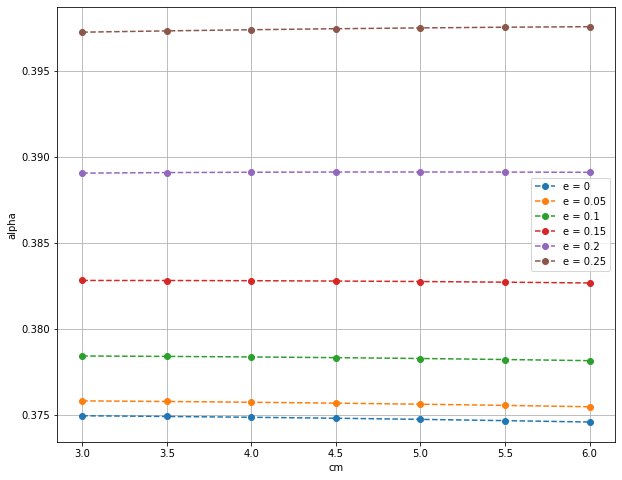

In [40]:
figure(figsize=(10, 8))
plt.plot(cm2, alpha0, label = 'e = 0', linestyle='--', marker='o')
plt.plot(cm2, alpha1, label = 'e = 0.05', linestyle='--', marker='o')
plt.plot(cm2, alpha2, label = 'e = 0.1', linestyle='--', marker='o')
plt.plot(cm2, alpha3, label = 'e = 0.15', linestyle='--', marker='o')
plt.plot(cm2, alpha4, label = 'e = 0.2', linestyle='--', marker='o')
plt.plot(cm2, alpha5, label = 'e = 0.25', linestyle='--', marker='o')
plt.grid()
plt.legend()
plt.xlabel('cm')
plt.ylabel('alpha')
plt.show()

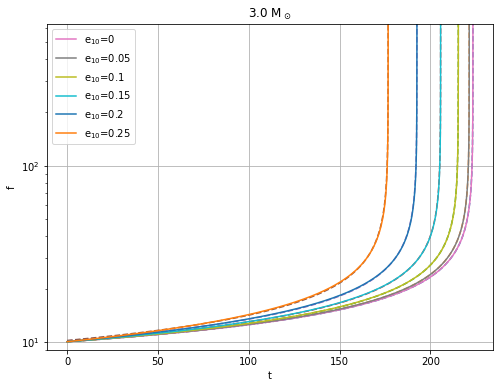

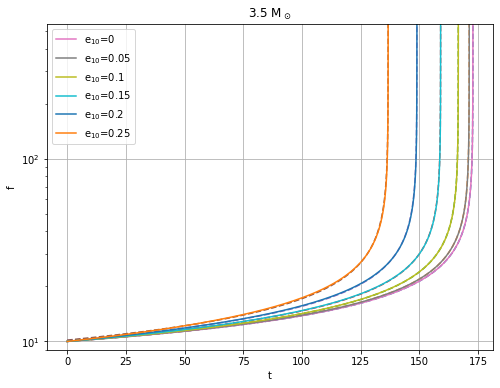

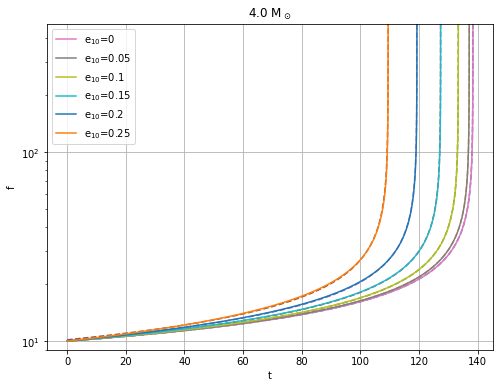

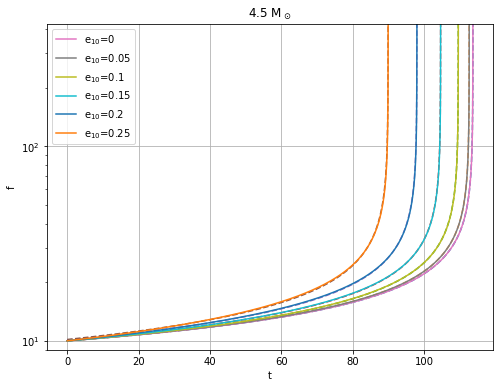

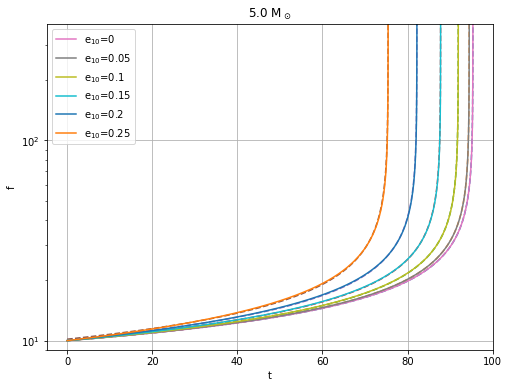

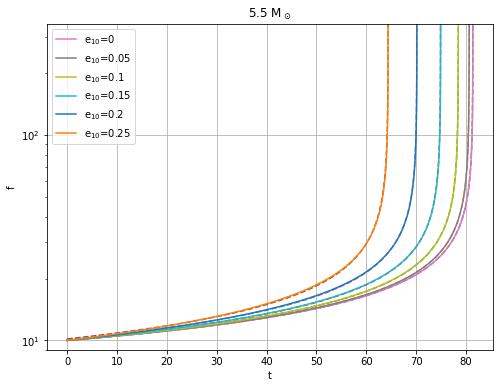

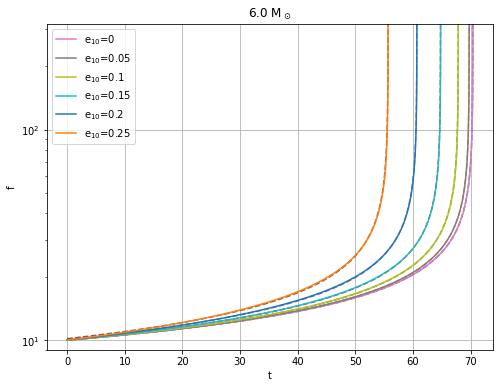

In [52]:
mc = np.linspace(3, 6, 7)
# fig, ax = plt.subplots()
for i in range(len(cm)):
    figure(figsize=(8, 6))
    
    plt.plot(tc1[i]-np.exp(x1[i]), f_1[i], linestyle='dashed')
    plt.plot(tc2[i]-np.exp(x2[i]), f_2[i], linestyle='dashed')
    plt.plot(tc3[i]-np.exp(x3[i]), f_3[i], linestyle='dashed')
    plt.plot(tc4[i]-np.exp(x4[i]), f_4[i], linestyle='dashed')
    plt.plot(tc5[i]-np.exp(x5[i]), f_5[i], linestyle='dashed')
    plt.plot(tc6[i]-np.exp(x6[i]), f_6[i], linestyle='dashed')
    
    plt.plot(t, f1[i], label = 'e=0')
    plt.plot(t, f2[i], label = 'e=0.05')
    plt.plot(t, f3[i], label = 'e=0.1')
    plt.plot(t, f4[i], label = 'e=0.15')
    plt.plot(t, f5[i], label = 'e=0.2')
    plt.plot(t, f6[i], label = 'e=0.25')
    
    # ax.set_yscale('log', basey= np.e)
    # plt.semilogy(basey=np.e)
    # plt.semilogx(basex=10)
    plt.yscale("log")
    # plt.yticks(np.arange(8, 15, 1))
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('f')
    plt.ylim(9, flso[i])
    # plt.xlim(0, 100)
    plt.title('Fig'+ str(i+1) + ': Frequency vs time from numerical analysis (solid) and through both slope and intercept(dashed) for chirp mass: '+ str(mc[i]) + ' solar mass')
    plt.grid()
    plt.show()

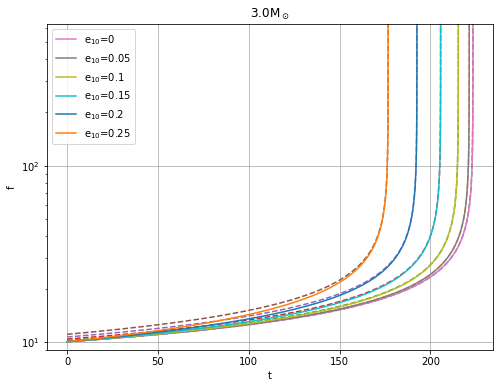

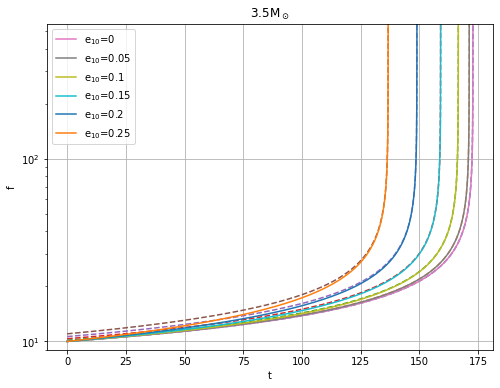

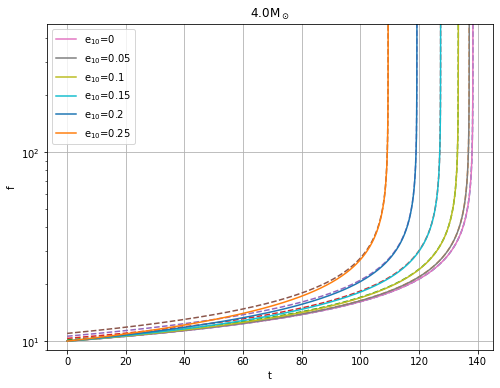

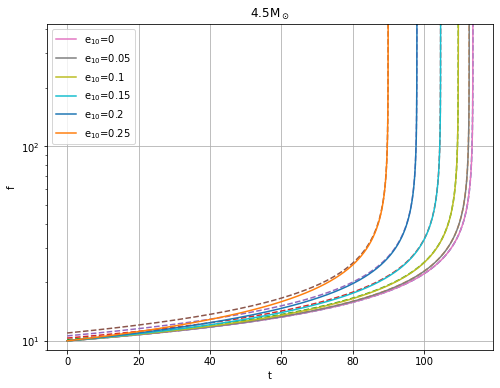

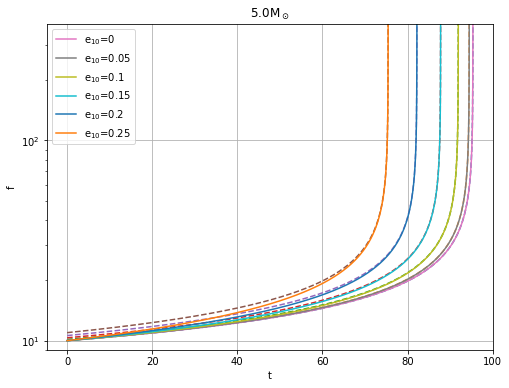

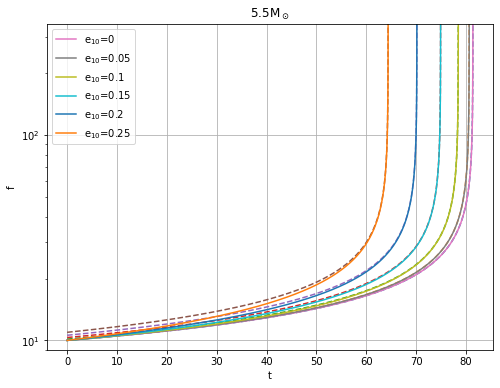

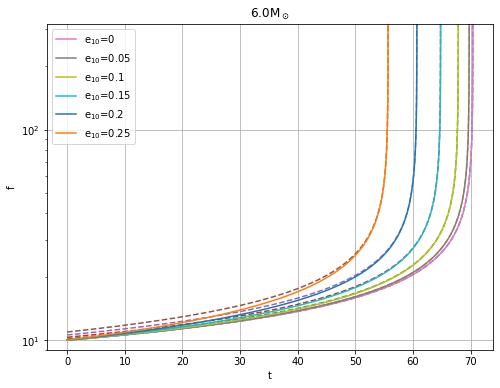

In [53]:
# fig, ax = plt.subplots()
for i in range(len(cm)):
    figure(figsize=(8, 6))
    
    plt.plot(tc1[i]-np.exp(x1[i]), f_14[i], linestyle='dashed')
    plt.plot(tc2[i]-np.exp(x2[i]), f_15[i], linestyle='dashed')
    plt.plot(tc3[i]-np.exp(x3[i]), f_16[i], linestyle='dashed')
    plt.plot(tc4[i]-np.exp(x4[i]), f_17[i], linestyle='dashed')
    plt.plot(tc5[i]-np.exp(x5[i]), f_18[i], linestyle='dashed')
    plt.plot(tc6[i]-np.exp(x6[i]), f_19[i], linestyle='dashed')
    
    plt.plot(t, f1[i], label = r'e$_{10}$=0')
    plt.plot(t, f2[i], label = r'e$_{10}$=0.05')
    plt.plot(t, f3[i], label = r'e$_{10}$=0.1')
    plt.plot(t, f4[i], label = r'e$_{10}$=0.15')
    plt.plot(t, f5[i], label = r'e$_{10}$=0.2')
    plt.plot(t, f6[i], label = r'e$_{10}$=0.25')
    
    # ax.set_yscale('log', basey= np.e)
    # plt.semilogy(basey=np.e)
    # plt.semilogx(basex=10)
    plt.yscale("log")
    # plt.yticks(np.arange(8, 15, 1))
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('f')
    plt.ylim(9, flso[i])
    # plt.xlim(0, 100)
    plt.title(str(3 + i*0.5) + r'M$_\odot$')
    plt.grid()
    plt.show()

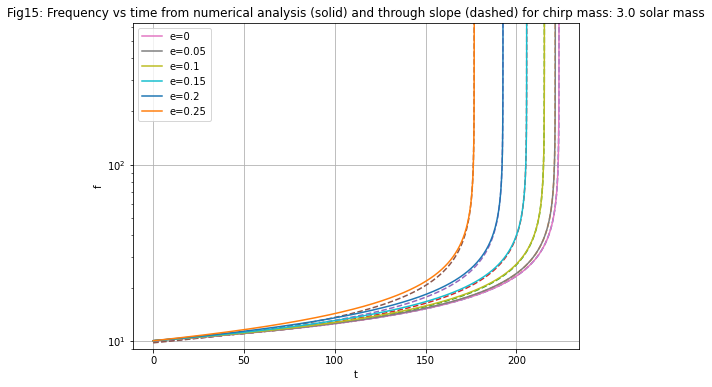

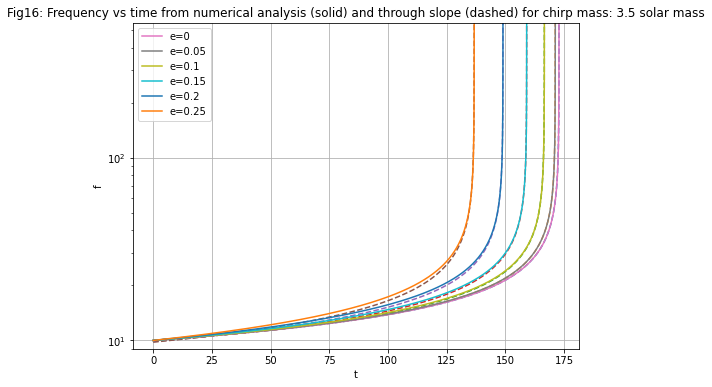

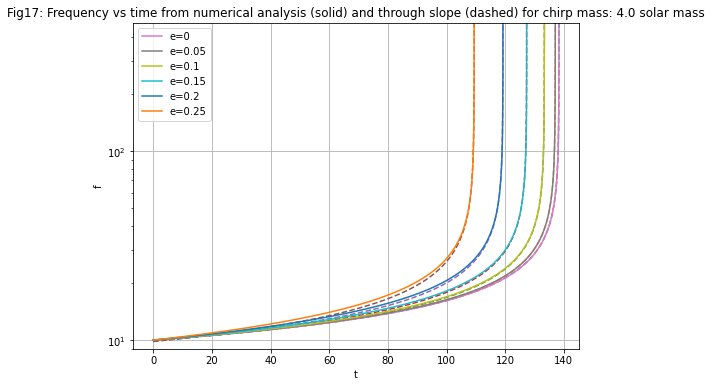

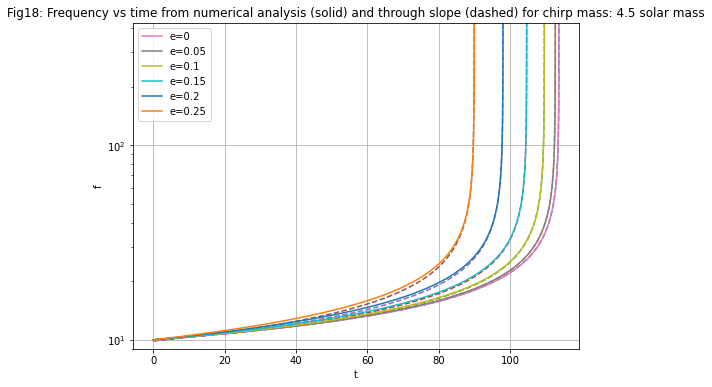

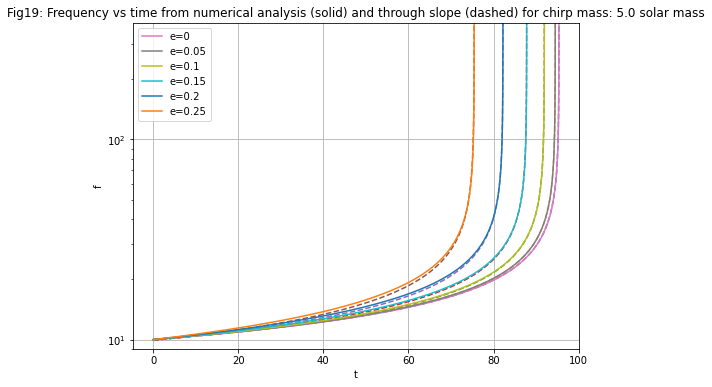

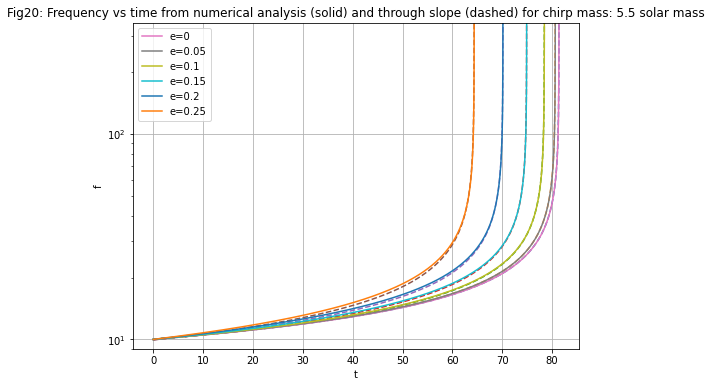

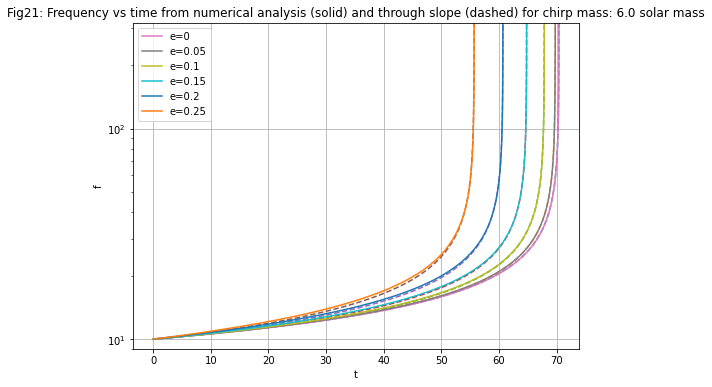

In [43]:
# fig, ax = plt.subplots()
for i in range(len(cm)):
    figure(figsize=(8, 6))
    
    plt.plot(tc1[i]-np.exp(x1[i]), f_20[i], linestyle='dashed')
    plt.plot(tc2[i]-np.exp(x2[i]), f_21[i], linestyle='dashed')
    plt.plot(tc3[i]-np.exp(x3[i]), f_23[i], linestyle='dashed')
    plt.plot(tc4[i]-np.exp(x4[i]), f_24[i], linestyle='dashed')
    plt.plot(tc5[i]-np.exp(x5[i]), f_25[i], linestyle='dashed')
    plt.plot(tc6[i]-np.exp(x6[i]), f_26[i], linestyle='dashed')
    
    plt.plot(t, f1[i], label = 'e=0')
    plt.plot(t, f2[i], label = 'e=0.05')
    plt.plot(t, f3[i], label = 'e=0.1')
    plt.plot(t, f4[i], label = 'e=0.15')
    plt.plot(t, f5[i], label = 'e=0.2')
    plt.plot(t, f6[i], label = 'e=0.25')
    
    # ax.set_yscale('log', basey= np.e)
    # plt.semilogy(basey=np.e)
    # plt.semilogx(basex=10)
    plt.yscale("log")
    # plt.yticks(np.arange(8, 15, 1))
    plt.legend()
    plt.xlabel('t')
    plt.ylabel('f')
    plt.ylim(9, flso[i])
    # plt.xlim(0, 100)
    plt.title('Fig'+ str(i+15) + ': Frequency vs time from numerical analysis (solid) and through slope (dashed) for chirp mass: '+ str(mc[i]) + ' solar mass')
    plt.grid()
    plt.show()